<a href="https://colab.research.google.com/github/Vantony-hub/Vantony-hub/blob/main/Muyiwa_Adeosun_Advanced_AI_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Done by:** Muyiwa Adeosun
**Class:** Artificial Inteligence_Advanced Level.


# Task 1
**Linear Regression**

Problem Statement:Build machine learning models for prediction



Dataset: House_Price_Prediction.csv

Task 1: Analyse the dataset and perform the steps below to build linear regression machine learning model.

In [186]:
# Import Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [187]:
pwd

'/content'

In [188]:
# Import Dataset
#Read the CSV file containing house price data into a DataFrame
data = pd.read_csv('/House_Price_Prediction.csv')
print (data)


     Unnamed: 0   price   lotsize  bedrooms  bathrms  stories driveway  \
0             0   42000  8.674197       3.0        1        2      yes   
1             1   38500  8.294050       2.0        1        1      yes   
2             2   49500  8.026170       3.0        1        1      yes   
3             3   60500  8.802372       3.0        1        2      yes   
4             4   61000  8.757784       3.0        1        1      yes   
..          ...     ...       ...       ...      ...      ...      ...   
546         546  107500  8.699515       3.0        2        4      yes   
547         547  108000  8.699515       3.0        2        3      yes   
548         548  113750  8.699515       3.0        1        4      yes   
549         549  120000  8.853665       3.0        1        4      yes   
550         550   70000  9.464983       3.0        1        1      yes   

    recroom fullbase gashw airco  garagepl prefarea  
0        no      yes    no    no         1       no  
1  

## Exploratory Data Analysis EDA

In [189]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0,42000,8.674197,3.0,1,2,yes,no,yes,no,no,1,no
1,1,38500,8.294050,2.0,1,1,yes,no,no,no,no,0,no
2,2,49500,8.026170,3.0,1,1,yes,no,no,no,no,0,no
3,3,60500,8.802372,3.0,1,2,yes,yes,no,no,no,0,no
4,4,61000,8.757784,3.0,1,1,yes,no,no,no,no,0,no


In [190]:
data.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,275.000000,68445.811252,8.470413,2.967332,1.286751,1.820327,0.698730
std,159.204271,26848.486040,0.399086,0.732880,0.502165,0.881334,0.863386
min,0.000000,25000.000000,7.408531,1.000000,1.000000,1.000000,0.000000
25%,137.500000,49500.000000,8.188689,3.000000,1.000000,1.000000,0.000000
50%,275.000000,62500.000000,8.433812,3.000000,1.000000,2.000000,0.000000
75%,412.500000,82950.000000,8.757784,3.000000,2.000000,2.000000,1.000000
max,550.000000,190000.000000,9.692767,6.000000,4.000000,4.000000,3.000000


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  551 non-null    int64  
 1   price       551 non-null    int64  
 2   lotsize     551 non-null    float64
 3   bedrooms    551 non-null    float64
 4   bathrms     551 non-null    int64  
 5   stories     551 non-null    int64  
 6   driveway    551 non-null    object 
 7   recroom     551 non-null    object 
 8   fullbase    551 non-null    object 
 9   gashw       541 non-null    object 
 10  airco       551 non-null    object 
 11  garagepl    551 non-null    int64  
 12  prefarea    551 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 56.1+ KB


In [192]:
print(data.shape)

(551, 13)


### Handling Missing Values

In [193]:

print(data.isna())
#to get summary of null values in each column
print(data.isna().sum())

     Unnamed: 0  price  lotsize  bedrooms  bathrms  stories  driveway  \
0         False  False    False     False    False    False     False   
1         False  False    False     False    False    False     False   
2         False  False    False     False    False    False     False   
3         False  False    False     False    False    False     False   
4         False  False    False     False    False    False     False   
..          ...    ...      ...       ...      ...      ...       ...   
546       False  False    False     False    False    False     False   
547       False  False    False     False    False    False     False   
548       False  False    False     False    False    False     False   
549       False  False    False     False    False    False     False   
550       False  False    False     False    False    False     False   

     recroom  fullbase  gashw  airco  garagepl  prefarea  
0      False     False  False  False     False     False  
1    

In [194]:
#checking to get summary of null values in each column
print(data.isna().sum())

Unnamed: 0     0
price          0
lotsize        0
bedrooms       0
bathrms        0
stories        0
driveway       0
recroom        0
fullbase       0
gashw         10
airco          0
garagepl       0
prefarea       0
dtype: int64


In [195]:

# Drop columns named 'Unnamed' and 'gashw' if they exist.
data=data.drop(['Unnamed: 0', 'gashw'], axis=1, errors='ignore')

In [196]:
#checking to get summary of null values in each column
print(data.isna().sum())

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
airco       0
garagepl    0
prefarea    0
dtype: int64


In [197]:
#checking the data types of all features in the data dataset
print(data.dtypes)

price         int64
lotsize     float64
bedrooms    float64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
airco        object
garagepl      int64
prefarea     object
dtype: object


In [198]:
#converting 'object' columns to 'category' type if they hold categorical data
data = data.astype({col: 'category' for col in data.columns if data[col].dtype == 'object'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   price     551 non-null    int64   
 1   lotsize   551 non-null    float64 
 2   bedrooms  551 non-null    float64 
 3   bathrms   551 non-null    int64   
 4   stories   551 non-null    int64   
 5   driveway  551 non-null    category
 6   recroom   551 non-null    category
 7   fullbase  551 non-null    category
 8   airco     551 non-null    category
 9   garagepl  551 non-null    int64   
 10  prefarea  551 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 29.2 KB


In [199]:
#perform data encoding to the dataset
#list of columns to encode
columns_to_encode=data.columns
data[columns_to_encode]=data[columns_to_encode].applymap(lambda x:1
                                                     if x=='yes'
                                                     else 0
                                                     if x=='no'
                                                     else x)
print(data.head())

   price   lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
0  42000  8.674197       3.0        1        2        1       0        1   
1  38500  8.294050       2.0        1        1        1       0        0   
2  49500  8.026170       3.0        1        1        1       0        0   
3  60500  8.802372       3.0        1        2        1       1        0   
4  61000  8.757784       3.0        1        1        1       0        0   

  airco  garagepl prefarea  
0     0         1        0  
1     0         0        0  
2     0         0        0  
3     0         0        0  
4     0         0        0  


<ipython-input-199-c5f41e7d1c0e>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[columns_to_encode]=data[columns_to_encode].applymap(lambda x:1


# Question 1.Data  Splitting-Split the data into training and testing datasets.


In [200]:
# Extracting the values from the DataFrame 'data' for columns 2 to 12 (inclusive)
x = data.iloc[:, 1:11].values

# Extracting the values from the DataFrame 'data' for column 1
y = data.iloc[:, 0].values

In [201]:
print(x)
print(y)

[[8.67419694 3.         1.         ... 0.         1.         0.        ]
 [8.29404964 2.         1.         ... 0.         0.         0.        ]
 [8.02617019 3.         1.         ... 0.         0.         0.        ]
 ...
 [8.69951475 3.         1.         ... 1.         2.         0.        ]
 [8.85366543 3.         1.         ... 1.         2.         0.        ]
 [9.46498259 3.         1.         ... 0.         2.         0.        ]]
[ 42000  38500  49500  60500  61000  66000  66000  69000  83800  88500
  90000  30500  27000  36000  37000  37900  40500  40750  45000  45000
  48500  65900  37900  38000  42000  42300  43500  44000  44500  44900
  45000  48000  49000  51500  61000  61000  61700  67000  82000  54500
  66500  70000  82000  92000  38000  44000  41000  43000  48000  54800
  55000  57000  68000  95000  38000  25000  25245  56000  35500  30000
  48000  48000  52000  54000  56000  60000  60000  67000  47000  70000
  45000  51000  32500  34000  35000  36000  45000  47000  5

In [202]:
# Importing the train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# x_train and x_test are the features for training and testing respectively
# y_train and y_test are the target variables for training and testing respectively
# test_size=0.2 indicates that 20% of the data will be used for testing
# random_state=6 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

In [203]:
# Displaying the training data
print("x_train")  # Print the label "x_train" to the console
print(x_train)  # Print the contents of the x_train variable (training features)

# Displaying the testing data
print("x_test")  # Print the label "x_test" to the console
print(x_test)  # Print the contents of the x_test variable (testing features)

x_train
[[8.81729778 2.         1.         ... 0.         0.         0.        ]
 [8.79709508 4.         2.         ... 0.         1.         0.        ]
 [8.90245559 2.         1.         ... 0.         1.         0.        ]
 ...
 [8.95802544 2.         1.         ... 0.         1.         0.        ]
 [9.48797211 2.         1.         ... 0.         1.         0.        ]
 [8.06620757 2.         1.         ... 0.         2.         0.        ]]
x_test
[[8.88183631 3.         2.         ... 1.         3.         0.        ]
 [8.57922858 2.         1.         ... 0.         1.         1.        ]
 [8.41183268 2.         1.         ... 0.         0.         0.        ]
 ...
 [8.30399997 2.         1.         ... 0.         0.         0.        ]
 [7.55223729 5.         1.         ... 0.         0.         0.        ]
 [8.94715577 3.         1.         ... 0.         0.         0.        ]]


In [204]:
# Displaying the training target variable data
print("y_train")  # Print the label "y_train" to the console
print(y_train)  # Print the contents of the y_train variable (training target values)

# Displaying the testing target variable data
print("y_test")  # Print the label "y_test" to the console
print(y_test)  # Print the contents of the y_test variable (testing target values)

y_train
[ 45000  87000  50000  49000  30000  60000  52900  60000  70000  65000
  95000  41000  67000  34000  57000  75000  74500  72000  66000  38000
  63500  83800  80000  48000 100500  59000  58000 112500  39000  60000
  57000  60000  87000  60000  48000  47000  54000  82900  55000  30500
  35000  40500  93000  78000  48000  80000  47500  46000  49900  32500
  68500  61000  53500  45000  44500 130000 108000  84000  65000  88500
  50000 124000  57500  42000  58500  61000  50000 132000  52000  92000
  60000  85000  58000  95000  57500  40000  54000  69900  64000  53000
  79000  94500  88000  35000  90000  66000  52000  70000  42000  32000
  50000  62000  47000  95000  50000  42000  64500  72000  72000  48000
  43000  80000 155000 190000  76900  52000 122000  45000 132000  72000
 140000  75000  51000  65000  38000  35000  61500 120000  35000  82500
  78900  43000  69900  63900  69500  60000  66000  75000  37900  64900
  55000  55500  45000  44000 102000  95500  40500  53000  54800  5800

In [205]:
# Print the shape of the training features (x_train)
# This shows the number of samples and features used for training the model.
print(x_train.shape)

# Print the shape of the testing features (x_test)
# This shows the number of samples and features used for evaluating the model.
print(x_test.shape)

# Print the shape of the training target variable (y_train)
# This shows the number of samples in the training target variable.
print(y_train.shape)

# Print the shape of the testing target variable (y_test)
# This shows the number of samples in the testing target variable.
print(y_test.shape)

(440, 10)
(111, 10)
(440,)
(111,)


## Question 2: Build A Linear Regression Model using the Training Dataset

In [206]:
from sklearn.linear_model import LinearRegression



In [207]:
# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Train the Linear Regression model using the training data (x_train and y_train)
regressor.fit(x_train, y_train)  # Training the algorithm

LinearRegression()

In [208]:
# Calculate the correlation matrix to understand the relationships between features.
# This helps in identifying potential predictors for house price and in feature selection.
data.corr()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
price,1.000000,0.560017,0.363247,0.513014,0.435332,0.298859,0.253611,0.175110,0.462458,0.385734,0.318696
lotsize,0.560017,1.000000,0.151814,0.198791,0.112181,0.332750,0.176168,0.035777,0.262216,0.365816,0.212355
bedrooms,0.363247,0.151814,1.000000,0.371325,0.399058,-0.010833,0.079088,0.094997,0.158087,0.136709,0.077366
bathrms,0.513014,0.198791,0.371325,1.000000,0.322034,0.042566,0.122017,0.100567,0.187823,0.170263,0.062495
stories,0.435332,0.112181,0.399058,0.322034,1.000000,0.125817,0.046397,-0.180526,0.312520,0.052983,0.034156
driveway,0.298859,0.332750,-0.010833,0.042566,0.125817,1.000000,0.091646,0.040602,0.109127,0.205116,0.196923
recroom,0.253611,0.176168,0.079088,0.122017,0.046397,0.091646,1.000000,0.369287,0.137408,0.041400,0.159972
fullbase,0.175110,0.035777,0.094997,0.100567,-0.180526,0.040602,0.369287,1.000000,0.037930,0.046609,0.231448
airco,0.462458,0.262216,0.158087,0.187823,0.312520,0.109127,0.137408,0.037930,1.000000,0.159165,0.109357
garagepl,0.385734,0.365816,0.136709,0.170263,0.052983,0.205116,0.041400,0.046609,0.159165,1.000000,0.087499


In [209]:
# Print the intercept of the Linear Regression model.
# The intercept represents the predicted house price when all other features are 0.
print(regressor.intercept_)

-164817.34956971902


In [210]:
# Print the coefficients of the Linear Regression model.
# These coefficients represent the learned weights assigned to each feature.
# They indicate the influence of each feature on the predicted house price.
print(regressor.coef_)

[21405.28316431  1947.40044742 14126.69066201  6618.67859191
  5154.41608767  2886.39373527  5825.43437992 12068.00701659
  4129.80931653 10312.76956526]


# Make Predictions using the created Model

In [211]:
# Predict house prices using the trained Linear Regression model
# This line uses the 'predict' method of the 'regressor' object (the trained model)
# to predict the target variable (house prices) for the testing dataset (x_test).
# The predicted values are stored in the 'y_pred' variable.
y_pred=regressor.predict(x_test)

In [212]:
print(y_pred)

[101452.4182499   63060.63268473  39880.48093444  54672.43985216
  52544.23516075  92681.34409941  42513.71779193  51396.27633493
  59451.021059    72596.73307528 104180.63576091  92572.26855408
  28372.33502739 114906.1691979   71255.87718114  92018.54132067
  61279.7966186   95362.5292032   57868.76825772  58656.25688151
 103320.75646253  69598.15564276  56744.08653671  28946.11381014
  32274.97957752  70412.05752912  92966.75298761  50261.66094797
  43821.67550782  52807.73184945  38727.0828619   68934.41163786
  30549.39752097  65261.85724373  77784.88823889  53807.93667218
  55566.04629129  82269.08799564  62477.31790246  35311.13183049
  74463.32643534  63147.80384786  55209.6061478   42911.44348597
  61990.88657842  77937.60291881  67711.19211377  87523.29860752
  54577.48836765  92920.82900091  52864.98091602  65649.73899062
  98788.60063897 107822.81589577  79169.29572596  86990.52249135
  71640.57828368  93275.23455136  31484.9033113   73687.12858445
  84591.23231241  56708.8

In [213]:
# Create a Pandas DataFrame to store actual and predicted house prices for comparison.
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# Print the DataFrame 'd1' to display the actual and predicted house prices side-by-side.
# This allows for easy visual comparison of the model's performance.
print(data)


     Actual      Predicted
0     90000  101452.418250
1     49500   63060.632685
2     51000   39880.480934
3     49000   54672.439852
4     50000   52544.235161
..      ...            ...
106   87500   83964.027350
107   25000   32496.797968
108   53000   42726.707441
109   62000   39766.912557
110   71000   67152.868025

[111 rows x 2 columns]


# Question 4. Model Evaluation Metrics

In [214]:
print(x_test)

[[8.88183631 3.         2.         ... 1.         3.         0.        ]
 [8.57922858 2.         1.         ... 0.         1.         1.        ]
 [8.41183268 2.         1.         ... 0.         0.         0.        ]
 ...
 [8.30399997 2.         1.         ... 0.         0.         0.        ]
 [7.55223729 5.         1.         ... 0.         0.         0.        ]
 [8.94715577 3.         1.         ... 0.         0.         0.        ]]


In [215]:
print(y_test)#actual salary
print(y_pred) #predicted salary

[ 90000  49500  51000  49000  50000  90000  49000  65000  41000  86900
 105000 108000  25245 128000  70000  79000  59500  88000  64500  60000
 107500  50000  32500  42000  36000  58550  85000  25000  44555  60000
  49500  52000  37200  40750  70000  42500  70000  85000  60000  34400
  63900  37900  65500  30000  57250  80000  31900  80000  73500 123500
  60500 120000 100000  92000  72500  77500  70500  68000  41000  73500
  75000  64500  55500  30000  79500  90000  93000  50000  78000  68100
  48000  62500  87250  56000  27000  44500  26500 106500  64000  53900
  70100  52900  75000  65000  94000  86000  51000  44500  42000  40000
  42000  44100  39000  37000  78500  78000  55000  96000  53000 133000
  70000  27000  45000  41000  60000  82000  87500  25000  53000  62000
  71000]
[101452.4182499   63060.63268473  39880.48093444  54672.43985216
  52544.23516075  92681.34409941  42513.71779193  51396.27633493
  59451.021059    72596.73307528 104180.63576091  92572.26855408
  28372.3350273

Mean Absolute Error: 10787.844715910347
Mean Squared Error: 192581965.37577865
Root Mean Squared Error: 13877.390438255265
R-squared: 0.6615999278005965


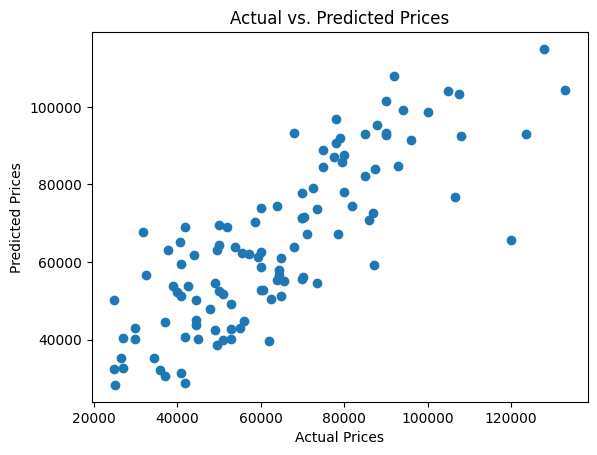

In [216]:
from sklearn import metrics
# Calculate and print the Mean Absolute Error (MAE) to evaluate the model's performance.
# MAE measures the average absolute difference between actual and predicted values.
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Print the Mean Squared Error (MSE) metric
# This metric is used to evaluate the performance of a regression model
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the Root Mean Squared Error (RMSE) between the actual and predicted values
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Calculate R-squared (coefficient of determination)
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared:', r2)

#  also visualize the performance using a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


# Task 2
Build  a Linear Regression model


In [217]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [218]:
# Define the model
model = LinearRegression()  # Create a Linear Regression model object

# Training the algorithm
# Apply hyperparameter tuning using GridSearchCV

# Define the parameter grid for hyperparameter tuning
# This dictionary specifies the hyperparameters to be tuned and their possible values.
param_grid = {'fit_intercept': [True], 'positive': [False]}
# 'fit_intercept': Whether to calculate the intercept for this model.
#                   Setting it to False forces the intercept to be 0.
# 'positive': When set to True, forces the coefficients to be positive.


# Create a GridSearchCV object
# This object will perform an exhaustive search over the specified parameter grid
# to find the best hyperparameter combination.
grid_search = GridSearchCV(estimator=model,  # The model to be tuned (Linear Regression)
                           param_grid=param_grid,  # The hyperparameter grid
                           cv=5,  # Number of cross-validation folds (5 in this case)
                           scoring='neg_mean_squared_error')
# The scoring metric to evaluate model performance (negative mean squared error)

# Fit the GridSearchCV object to the training data
# This step starts the hyperparameter tuning process.
# GridSearchCV trains and evaluates the model with different hyperparameter combinations
# using cross-validation and selects the best combination based on the scoring metric.
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True], 'positive': [False]},
             scoring='neg_mean_squared_error')

In [219]:
# prompt:  Create a dataframe to store the result of GridSearchCV for all the models which will include model_name,best_score_and best_params_

# Create an empty list to store the results
results = []

# Assuming you have a list of models and their corresponding GridSearchCV objects
# Example:
models = [
    ('Linear Regression', grid_search)]

# Loop through each model and store the results
for model_name, grid in models:
  results.append({
      'model_name': model_name,
      'best_score': grid.best_score_,
      'best_params': grid.best_params_
  })

# Create a DataFrame from the list of results
results_data = pd.DataFrame(results)

# Print the DataFrame
results_data

,model_name,best_score,best_params
0,Linear Regression,-2.663821e+08,"{'fit_intercept': True, 'positive': False}"


# Task 3
Analyse the dataset and perform the steps below to build k-Nearest Neighbour (kNN)
model.

In [220]:
# Import Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [221]:
pwd

'/content'

In [222]:
# Import Dataset
#Read the CSV file containing house price data into a DataFrame
d1 = pd.read_csv('/cancer-data-2.csv')
print (d1)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [223]:
print(d1.isna())
#to get summary of null values in each column
print(d1.isna().sum())

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
..         ...          ...           ...             ...        ...   
564      False        False         False           False      False   
565      False        False         False           False      False   
566      False        False         False           False      False   
567      False        False         False           False      False   
568      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False  

In [224]:
print(d1.shape)
print(d1.dtypes)

(569, 31)
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave po

In [225]:
# Extracting the values from the DataFrame 'd1' for columns 2 to 12 (inclusive)
x = d1.iloc[:, 2:31].values

# Extracting the values from the DataFrame 'd1' for column 1
y = d1.iloc[:, 0].values
print(x)
print(y)

[[1.038e+01 1.228e+02 1.001e+03 ... 2.654e-01 4.601e-01 1.189e-01]
 [1.777e+01 1.329e+02 1.326e+03 ... 1.860e-01 2.750e-01 8.902e-02]
 [2.125e+01 1.300e+02 1.203e+03 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [2.808e+01 1.083e+02 8.581e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.933e+01 1.401e+02 1.265e+03 ... 2.650e-01 4.087e-01 1.240e-01]
 [2.454e+01 4.792e+01 1.810e+02 ... 0.000e+00 2.871e-01 7.039e-02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 

In [226]:
# Importing the train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# x_train and x_test are the features for training and testing respectively
# y_train and y_test are the target variables for training and testing respectively
# test_size=0.2 indicates that 20% of the data will be used for testing
# random_state=6 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

In [227]:
# Displaying the training data
print("x_train")  # Print the label "x_train" to the console
print(x_train)  # Print the contents of the x_train variable (training features)

# Displaying the testing data
print("x_test")  # Print the label "x_test" to the console
print(x_test)  # Print the contents of the x_test variable (testing features)
# Displaying the training target variable data
print("y_train")  # Print the label "y_train" to the console
print(y_train)  # Print the contents of the y_train variable (training target values)

# Displaying the testing target variable data
print("y_test")  # Print the label "y_test" to the console
print(y_test)  # Print the contents of the y_test variable (testing target values)
# Print the shape of the training features (x_train)
# This shows the number of samples and features used for training the model.
print(x_train.shape)

# Print the shape of the testing features (x_test)
# This shows the number of samples and features used for evaluating the model.
print(x_test.shape)

# Print the shape of the training target variable (y_train)
# This shows the number of samples in the training target variable.
print(y_train.shape)

# Print the shape of the testing target variable (y_test)
# This shows the number of samples in the testing target variable.
print(y_test.shape)

x_train
[[1.274e+01 7.684e+01 4.486e+02 ... 7.025e-02 2.514e-01 7.898e-02]
 [2.708e+01 7.176e+01 3.957e+02 ... 2.083e-02 2.849e-01 7.087e-02]
 [1.859e+01 8.509e+01 5.120e+02 ... 1.258e-01 3.113e-01 8.317e-02]
 ...
 [2.100e+01 1.118e+02 9.186e+02 ... 1.827e-01 2.623e-01 7.599e-02]
 [2.178e+01 1.338e+02 1.293e+03 ... 1.765e-01 2.609e-01 6.735e-02]
 [1.551e+01 9.745e+01 6.845e+02 ... 1.379e-01 2.954e-01 8.362e-02]]
x_test
[[1.870e+01 1.203e+02 1.033e+03 ... 1.325e-01 3.021e-01 7.987e-02]
 [1.426e+01 1.025e+02 7.044e+02 ... 2.393e-01 4.667e-01 9.946e-02]
 [1.321e+01 9.765e+01 7.118e+02 ... 8.178e-02 2.487e-01 6.766e-02]
 ...
 [2.527e+01 1.024e+02 7.324e+02 ... 2.024e-01 4.027e-01 9.876e-02]
 [1.890e+01 1.295e+02 1.217e+03 ... 1.980e-01 2.968e-01 9.929e-02]
 [1.493e+01 7.387e+01 4.063e+02 ... 9.608e-02 2.664e-01 7.809e-02]]
y_train
[0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a kNN classifier with k=5 (you can adjust k)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the kNN model using the training data
knn_model.fit(x_train, y_train)

# I now have a trained kNN model ready for predictions.
# I can use x_test to make predictions and compare them with y_test to evaluate the model.

KNeighborsClassifier()

In [229]:
# Predict house prices using the trained Linear Regression model
# This line uses the 'predict' method of the 'regressor' object (the trained model)
# to predict the target variable (house prices) for the testing dataset (x_test).
# The predicted values are stored in the 'y_pred' variable.
y_pred=knn_model.predict(x_test)
print(y_pred)

[1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 0]


In [230]:
# Create a Pandas DataFrame to store actual and predicted house prices for comparison.
d1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# Print the DataFrame 'd1' to display the actual and predicted house prices side-by-side.
# This allows for easy visual comparison of the model's performance.
print(d1)

     Actual  Predicted
0         1          1
1         1          1
2         0          0
3         0          0
4         1          1
..      ...        ...
109       0          0
110       1          1
111       1          1
112       1          1
113       0          0

[114 rows x 2 columns]


Mean Absolute Error: 0.06140350877192982
Mean Squared Error: 0.06140350877192982
Root Mean Squared Error: 0.24779731389167603
R-squared: 0.7543103448275862


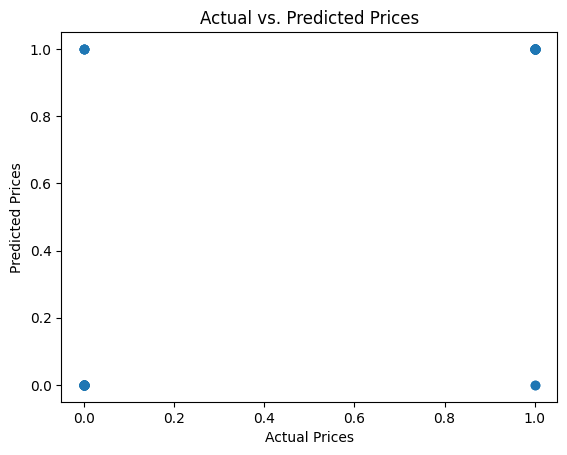

In [231]:
from sklearn import metrics
# Calculate and print the Mean Absolute Error (MAE) to evaluate the model's performance.
# MAE measures the average absolute difference between actual and predicted values.
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Print the Mean Squared Error (MSE) metric
# This metric is used to evaluate the performance of a regression model
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the Root Mean Squared Error (RMSE) between the actual and predicted values
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Calculate R-squared (coefficient of determination)
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared:', r2)

#  also visualize the performance using a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [232]:
# check for f1 score

from sklearn.metrics import f1_score

# Assuming you have y_test (true labels) and y_pred (predicted labels)
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class

print("F1 Score:", f1)

F1 Score: 0.9385823157354718


##In summary:

An F1 score of 0.93858 indicates a very strong and effective model for the given classification task. It demonstrates a good balance between precision and recall, meaning the model is accurate and reliable in its predictions.



# Task 4
Build k-Nearest Neighbour (kNN) classification model.

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a kNN classifier with k=5 (you can adjust k)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the kNN model using the training data
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [234]:
# prompt:  Apply hyperparameter tuning using GridSearchCV.

# Apply hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],  # Possible values for k
              'weights': ['uniform', 'distance'],  # Weighting scheme
              'metric': ['euclidean', 'manhattan']}  # Distance metric

grid_search = GridSearchCV(estimator=knn_model,  # The model to be tuned (kNN)
                           param_grid=param_grid,  # The hyperparameter grid
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy')  # Metric to optimize (accuracy)

grid_search.fit(x_train, y_train)

# PrintING the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

#I  can now use the best model found by GridSearchCV for predictions
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(x_test)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Accuracy: 0.9472527472527472


In [235]:
#Create a dataframe to store the result of GridSearchCV for model which will
# include model_name, best_score_ and best_params_

# Create an empty list to store the results
results = []

# Assuming you have a list of models and their corresponding GridSearchCV objects
# Example:
models = [
    ('knn_model', grid_search),
    # Add other models and their GridSearchCV objects here
]

# Loop through each model and store the results
for model_name, grid in models:
  results.append({
      'model_name': model_name,
      'best_score': grid.best_score_,
      'best_params': grid.best_params_
  })

# Create a DataFrame from the list of results
results_data = pd.DataFrame(results)

# Print the DataFrame
results_data

,model_name,best_score,best_params
0,knn_model,0.947253,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei..."
